# Data Analysis

## Get, clean, process, analyze, and write about publicly available data from `data.michigan.gov`

Data Source: <https://data.michigan.gov/Code-Michigan/Car-Accidents/p54v-8v6s>

In [5]:
# Make plots inline
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import pandas as pd
import seaborn as sns

accidents = pd.read_csv("Car_Accidents.csv")
accidents.columns

Index(['version https://git-lfs.github.com/spec/v1'], dtype='object')

In [2]:
accidents['acc_num_injy'].describe()

count    484513.000000
mean          0.243721
std           0.609772
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          46.000000
Name: acc_num_injy, dtype: float64

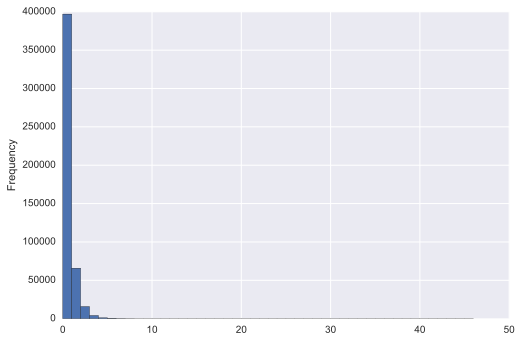

In [3]:
injuries = accidents.acc_num_injy
injuries.plot.hist(
    bins = injuries.max()
)

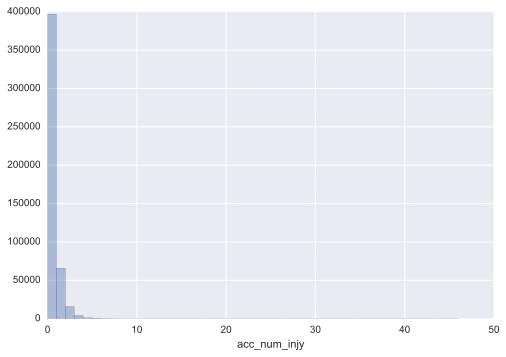

In [4]:
sns.distplot(
    injuries,
    hist = True,
    kde = False, # don't show a kernel density estimate
    bins = injuries.max())

In [5]:
accidents['formatted_date'] = pd.to_datetime(
    accidents.acc_date_val,
    format = "%Y%m%d"
)

accidents.formatted_date.tail()

484508   2014-08-28
484509   2014-08-06
484510   2014-08-31
484511   2014-06-21
484512   2014-08-21
Name: formatted_date, dtype: datetime64[ns]

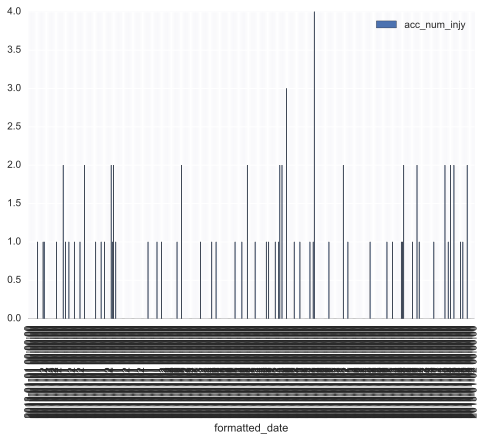

In [6]:
# A surprisingly slow plot
accidents[:400].plot.bar(
    x = 'formatted_date',
    y = 'acc_num_injy'
)

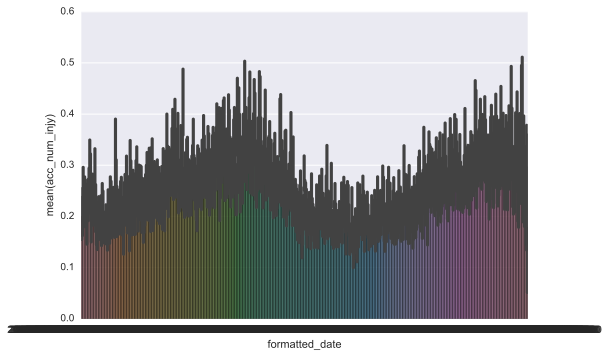

In [7]:
# Takes a bit to run, but it's worth it to see seasonal variation
sns.barplot(
    x = accidents.formatted_date,
    y = accidents.acc_num_injy
)

# Modeling

## Implement, tweak, and reason about a model using `mesa` - an agent-based modeling framework for Python

This example is taken from the `mesa` documentation: <http://mesa.readthedocs.io/en/latest/tutorials/intro_tutorial.html>

In [ ]:
import random
from mesa import Agent, Model
from mesa.time import RandomActivation


class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id):
        self.unique_id = unique_id
        self.wealth = 1

    def step(self, model):
        if self.wealth == 0:
            return
        other_agent = random.choice(model.schedule.agents)
        contest_outcome = random.choice([-1, +1])
        other_agent.wealth += contest_outcome
        self.wealth -= contest_outcome

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i)
            self.schedule.add(a)

    

In [ ]:
empty_model = MoneyModel(10)
empty_model.step()

Let's create ten agents and run our model for 10 steps

In [ ]:
model = MoneyModel(10)
for i in range(10):
    model.step()

In [ ]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)